In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, RobustScaler
from sklearn.svm import SVR

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Memuat dataset

In [2]:
rumah = pd.read_csv('melb_data.csv')

In [3]:
rumah = rumah.iloc[0:5000]

<blockquote>Sesuai instruksi di ujian, kami menggunakan 5000 row untuk tugas ini</blockquote>

In [4]:
rumah.shape

(5000, 21)

In [5]:
rumah.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [6]:
rumah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         5000 non-null   object 
 1   Address        5000 non-null   object 
 2   Rooms          5000 non-null   int64  
 3   Type           5000 non-null   object 
 4   Price          5000 non-null   float64
 5   Method         5000 non-null   object 
 6   SellerG        5000 non-null   object 
 7   Date           5000 non-null   object 
 8   Distance       5000 non-null   float64
 9   Postcode       5000 non-null   float64
 10  Bedroom2       5000 non-null   float64
 11  Bathroom       5000 non-null   float64
 12  Car            5000 non-null   float64
 13  Landsize       5000 non-null   float64
 14  BuildingArea   2838 non-null   float64
 15  YearBuilt      3224 non-null   float64
 16  CouncilArea    5000 non-null   object 
 17  Lattitude      5000 non-null   float64
 18  Longtitu

In [7]:
rumah.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,5000.0,2.888800e+00,0.963649,1.0000,2.000000,3.0000,3.000000e+00,8.000000e+00
Price,5000.0,1.137445e+06,671591.277922,85000.0000,680000.000000,950000.0000,1.417062e+06,6.500000e+06
Distance,5000.0,8.698000e+00,3.396407,1.6000,5.900000,8.8000,1.120000e+01,1.500000e+01
Postcode,5000.0,3.099182e+03,60.119980,3000.0000,3046.000000,3081.0000,3.148000e+03,3.207000e+03
Bedroom2,5000.0,2.845400e+00,0.955239,0.0000,2.000000,3.0000,3.000000e+00,9.000000e+00
Bathroom,5000.0,1.535000e+00,0.716434,0.0000,1.000000,1.0000,2.000000e+00,8.000000e+00
Car,5000.0,1.556400e+00,0.920972,0.0000,1.000000,1.0000,2.000000e+00,8.000000e+00
Landsize,5000.0,4.567320e+02,1343.621956,0.0000,145.000000,347.5000,6.192500e+02,7.510000e+04
BuildingArea,2838.0,1.506240e+02,178.182062,0.0000,90.000000,125.0000,1.760000e+02,6.791000e+03
YearBuilt,3224.0,1.960598e+03,37.699725,1830.0000,1930.000000,1960.0000,1.997250e+03,2.018000e+03


<blockquote>Target Feature : <b>Price</b></blockquote>
<blockquote> karna menurut kami harga sebagai nilai utama dari analisa ini</blockquote>



#### Feature description
   * Rooms: Number of rooms
   * Price: Price in dollars
   * Method: S - property sold;/n
       SP - property sold prior;
       PI - property passed in;
       PN - sold prior not disclosed;
       SN - sold not disclosed; NB - no bid;
       VB - vendor bid;
       W - withdrawn prior to auction;
       SA - sold after auction;
       SS - sold after auction price not disclosed. N/A - price or highest bid not available.
   * Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.
   * SellerG: Real Estate Agent
   * Date: Date sold
   * Distance: Distance from CBD
   * Regionname: General Region (West, North West, North, North east …etc)
   * Propertycount: Number of properties that exist in the suburb.
   * Bedroom2 : Scraped # of Bedrooms (from different source)
   * Bathroom: Number of Bathrooms
   * Car: Number of carspots
   * Landsize: Land Size
   * BuildingArea: Building Size
   * CouncilArea: Governing council for the area




## Preprocessing

In [8]:
rumah['Date'] = pd.to_datetime(rumah['Date'])

In [9]:
rumah['Hari_sold'] = rumah.apply(lambda x: x['Date'].dayofweek, axis=1)

In [10]:
rumah['Bulan_sold'] = rumah.apply(lambda x: x['Date'].month, axis=1)

In [11]:
rumah['Tahun_sold'] = rumah.apply(lambda x: x['Date'].year, axis=1)

<blockquote>Untuk memproses date saya akan mengonversi kolom date mejadi hari, bulan dan tahun. Karna waktu adalah hal penting untuk menentukan harga sebuah rumah dan harga properti cenrung meningkat seriring waktu berjalan</blockquote>



#### menentukan attribute dan target column name

In [12]:
target_cols = 'Price'
attribute_cols = ['Suburb',
                  'Rooms',
                  'Type',
                  'Method',
                  'SellerG',
                  'Tahun_sold',
                  'Bulan_sold',
                  'Hari_sold',
                  'Distance',
                  'Postcode',
                  'Bedroom2',
                  'Bathroom',
                  'Car',
                  'Landsize',
                  'BuildingArea',
                  'YearBuilt',
                  'CouncilArea',
                  'Regionname',
                  'Propertycount']

X = rumah[attribute_cols]
y = rumah[target_cols]

### Cek Missing Data

In [13]:
rumah.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea     2162
YearBuilt        1776
CouncilArea         0
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
Hari_sold           0
Bulan_sold          0
Tahun_sold          0
dtype: int64

#### BuildingArea & YearBuilt

BuildingArea akan memengaruhi harga rumah. hampir setengah dari dataset adalah jumlah area bangunan. 


In [14]:
rumah.shape

(5000, 24)

<blockquote>Sebelum dataset yang sudah di potong 5000 di drop</blockquote>

In [15]:
rumah.dropna(inplace=True)

In [16]:
rumah.shape

(2735, 24)

<blockquote>5000 - 2735 = 2265
    
    
    jadi kita kehilangan 2265 row dari 5000 row
</blockquote>

In [17]:
rumah_penuh = pd.read_csv('melb_data.csv')

In [18]:
rumah_tersisa = rumah_penuh.iloc[5000:]

In [19]:
rumah_samplebaru = rumah_tersisa[(rumah_tersisa['BuildingArea'].notna())
                             & (rumah_tersisa['YearBuilt'].notna()) 
                             & (rumah_tersisa['CouncilArea'].notna())].sample(2265)

In [20]:
rumah_samplebaru.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

<blockquote> Nicee, jadi terlihat lebih baik

In [21]:
rumah = rumah.append(rumah_samplebaru)

In [22]:
rumah.reset_index()

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Hari_sold,Bulan_sold,Tahun_sold
0,1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02 00:00:00,2.5,...,79.00,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0,5.0,4.0,2016.0
1,2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03 00:00:00,2.5,...,150.00,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0,0.0,4.0,2017.0
2,4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06 00:00:00,2.5,...,142.00,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0,2.0,4.0,2016.0
3,6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,2016-07-05 00:00:00,2.5,...,210.00,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4019.0,1.0,7.0,2016.0
4,7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,2016-08-10 00:00:00,2.5,...,107.00,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4019.0,2.0,8.0,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8416,Sunshine,69 Duke St,3,h,710000.0,S,Village,29/04/2017,12.6,...,93.84,1950.0,Brimbank,-37.78750,144.84560,Western Metropolitan,3755.0,NaN,NaN,NaN
4996,8307,Reservoir,1/74 Miranda Rd,3,h,605000.0,S,Love,13/05/2017,11.2,...,112.00,1950.0,Darebin,-37.70680,145.01930,Northern Metropolitan,21650.0,NaN,NaN,NaN
4997,11861,Werribee,17 Xavier Ct,4,h,510000.0,SP,YPA,22/07/2017,14.7,...,147.00,2003.0,Wyndham,-37.89556,144.64268,Western Metropolitan,16166.0,NaN,NaN,NaN
4998,7373,Cremorne,175 Dover St,2,t,1010000.0,S,hockingstuart,24/09/2016,2.5,...,151.00,1998.0,Yarra,-37.83110,144.99140,Northern Metropolitan,1123.0,NaN,NaN,NaN


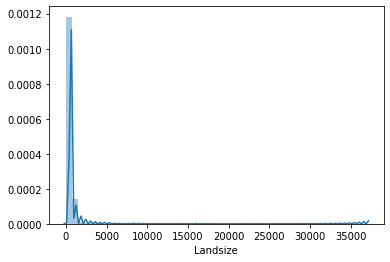

In [23]:
sns.distplot(rumah['Landsize'])
plt.show()

<blockquote>
    terlihat ada keanehan dimana daerah perkotaan harusnya memiliki ukuran tanah yang sama perwilayahnya

In [24]:
median_landsize = rumah.groupby('CouncilArea')['Landsize'].median()

In [25]:
rumah['Landsize'] = rumah.apply(lambda x: median_landsize[x['CouncilArea']] if x['Landsize'] == 0 else x['Landsize'], axis=1)

## EDA

In [26]:
rumah.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,5000.0,2.933400e+00,0.978548,1.00000,2.000000,3.000000,4.000000e+00,8.000000e+00
Price,5000.0,1.082524e+06,680197.619691,131000.00000,627375.000000,883500.000000,1.350000e+06,8.000000e+06
Distance,5000.0,9.558740e+00,5.311878,0.00000,5.900000,8.900000,1.210000e+01,4.730000e+01
Postcode,5000.0,3.101762e+03,84.768740,3000.00000,3044.000000,3081.000000,3.147000e+03,3.977000e+03
Bedroom2,5000.0,2.900800e+00,0.977727,0.00000,2.000000,3.000000,3.000000e+00,9.000000e+00
Bathroom,5000.0,1.584000e+00,0.725706,1.00000,1.000000,1.000000,2.000000e+00,8.000000e+00
Car,5000.0,1.565600e+00,0.912504,0.00000,1.000000,1.000000,2.000000e+00,1.000000e+01
Landsize,5000.0,5.156806e+02,934.004421,1.00000,213.000000,400.500000,6.250000e+02,3.700000e+04
BuildingArea,5000.0,1.427351e+02,95.023823,0.00000,90.000000,124.000000,1.710000e+02,3.112000e+03
YearBuilt,5000.0,1.963824e+03,37.075952,1830.00000,1940.000000,1970.000000,2.000000e+03,2.018000e+03


### Target (Price)

#### Distribusi & Outlier

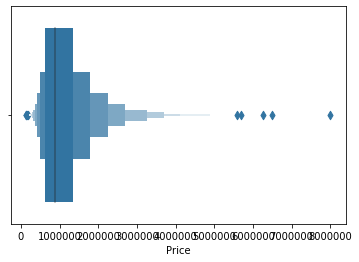

In [27]:
sns.boxenplot(rumah['Price'])
plt.show()

In [28]:
x = rumah['Price']
iqr = x.quantile(.75) - x.quantile(.25)
low = x.quantile(.25) - (1.5*iqr)
high = x.quantile(.75) + (1.5*iqr)

outlier_price = rumah[rumah['Price'] >= high]

In [29]:
outlier_price.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Hari_sold,Bulan_sold,Tahun_sold
80,Albert Park,112 Beaconsfield Pde,3,h,2850000.0,PI,Buxton,2017-04-03 00:00:00,3.3,3206.0,...,198.0,1890.0,Port Phillip,-37.8481,144.9499,Southern Metropolitan,3280.0,0.0,4.0,2017.0
92,Albert Park,2 Dundas Pl,3,h,2615000.0,S,Cayzer,2016-10-12 00:00:00,3.3,3206.0,...,181.0,1880.0,Port Phillip,-37.8415,144.9585,Southern Metropolitan,3280.0,2.0,10.0,2016.0
102,Albert Park,97 Page St,3,h,3010000.0,S,Greg,2017-03-18 00:00:00,3.3,3206.0,...,146.0,1890.0,Port Phillip,-37.8473,144.9551,Southern Metropolitan,3280.0,5.0,3.0,2017.0
103,Albert Park,55 Withers St,4,h,2800000.0,VB,Cayzer,2016-06-18 00:00:00,3.3,3206.0,...,254.0,1910.0,Port Phillip,-37.8467,144.9475,Southern Metropolitan,3280.0,5.0,6.0,2016.0
108,Albert Park,115 Page St,4,h,4735000.0,S,Marshall,2017-02-25 00:00:00,3.3,3206.0,...,207.0,1910.0,Port Phillip,-37.8477,144.9558,Southern Metropolitan,3280.0,5.0,2.0,2017.0


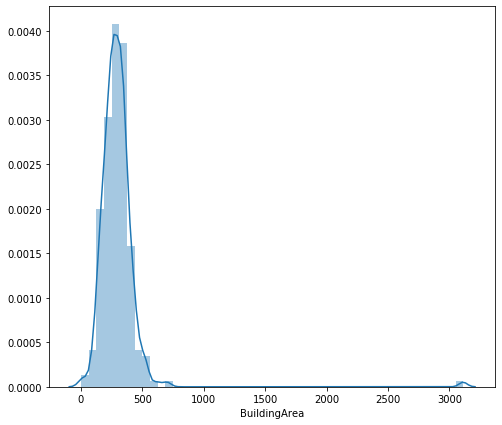

In [30]:
plt.figure(figsize = (8,7))
sns.distplot(outlier_price['BuildingArea'])
plt.show()

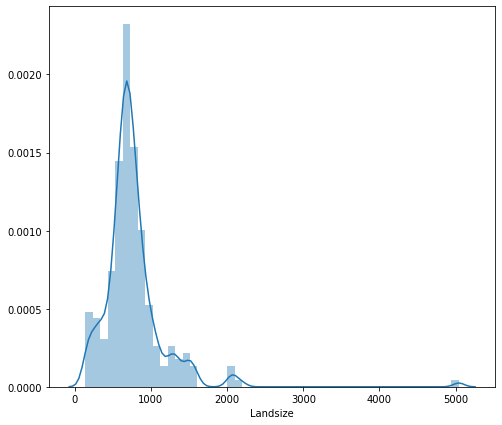

In [31]:
plt.figure(figsize = (8,7))
sns.distplot(outlier_price['Landsize'])
plt.show()

In [32]:
outlier_price['Landsize'].mean()

768.4248927038626

<blockquote> Sebagian rumah-rumah besar dengan landsize besar mengisi kategori outlier ini

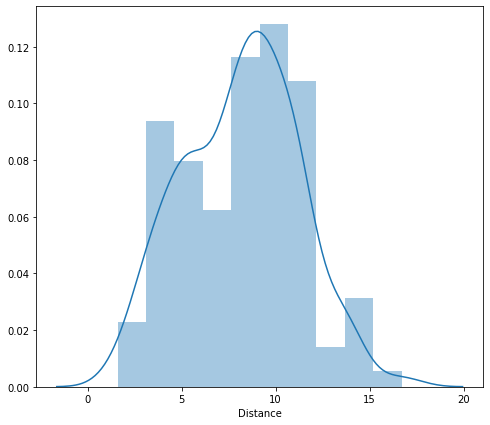

In [33]:
plt.figure(figsize = (8,7))
sns.distplot(outlier_price['Distance'])
plt.show()

In [34]:
rumah['YearBuilt'] = rumah['YearBuilt'].astype(int)

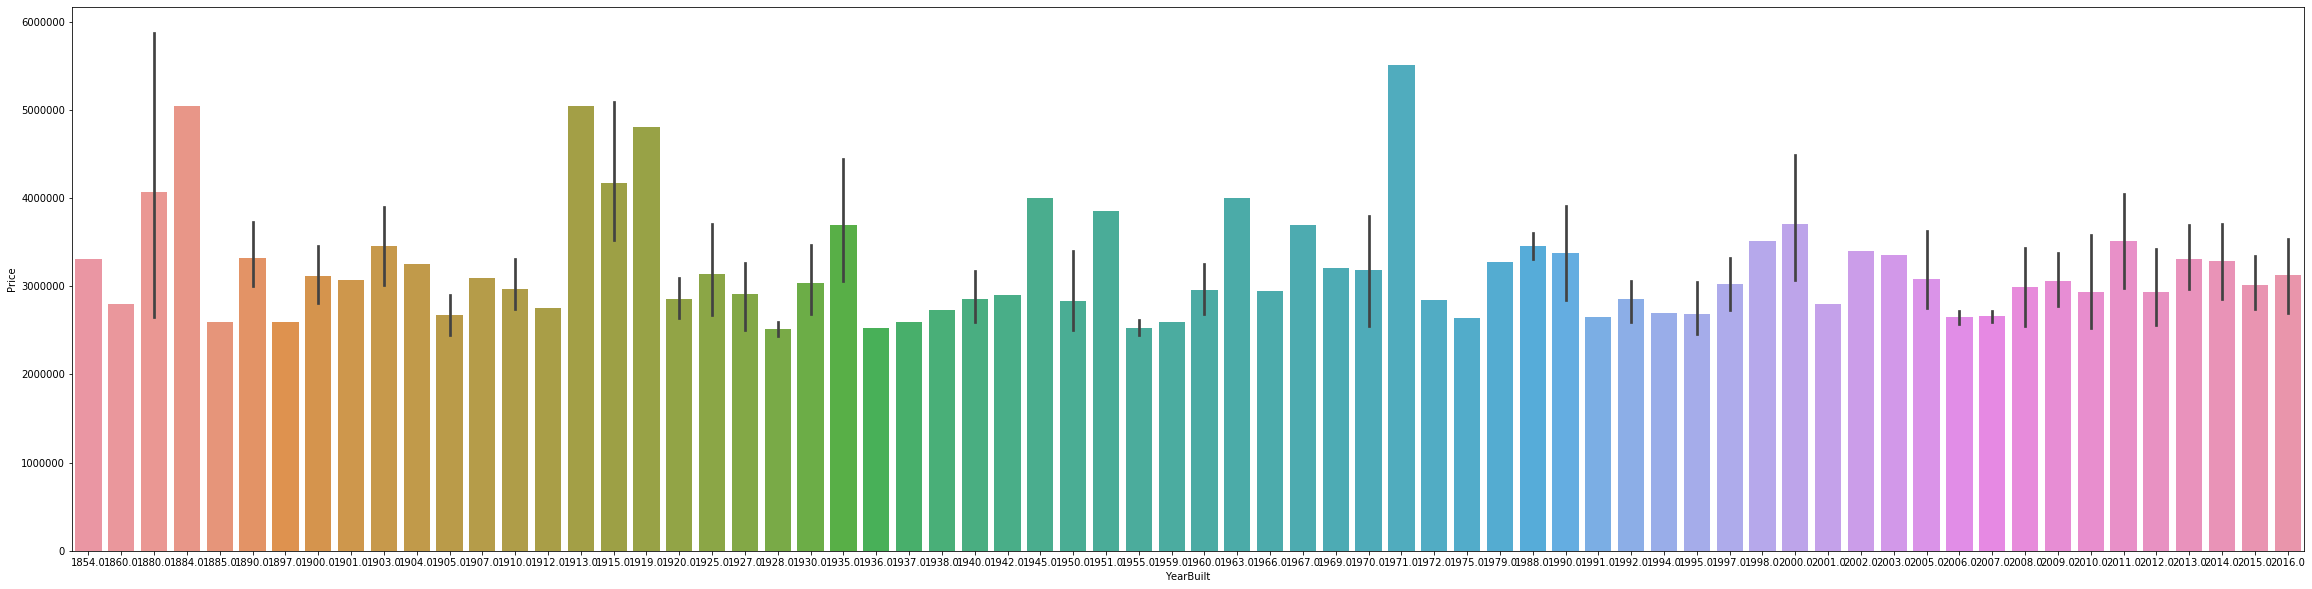

In [35]:
plt.figure(figsize=(40,10))
sns.barplot(x='YearBuilt', y='Price', data=outlier_price)
plt.show()

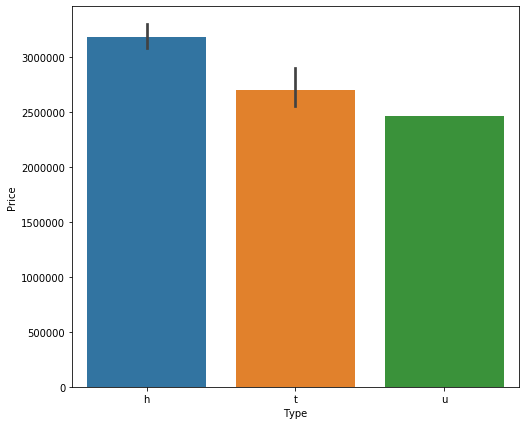

In [36]:
plt.figure(figsize = (8,7))
sns.barplot(x='Type', y='Price', data=outlier_price)
plt.show()

<blockquote> Properti di sini yang paling mahal adalah House & townHouses

### Categorical Variables dan berhubungan dengan target variable

#### Rooms terhadap Price


In [37]:
rnp = rumah.groupby('Rooms')[['Price','Rooms']].agg('median')
rnp

,Price,Rooms
Rooms,,
1,380000.0,1
2,650000.0,2
3,935000.0,3
4,1336500.0,4
5,1900000.0,5
6,1853000.0,6
7,1642000.0,7
8,881000.0,8


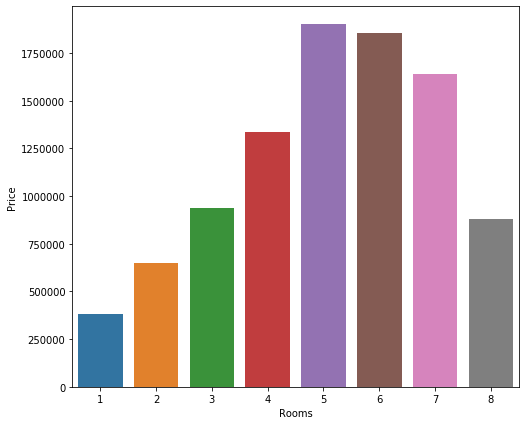

In [38]:
plt.figure(figsize = (8,7))
sns.barplot(x='Rooms', y='Price', data = rnp)
plt.show()

<blockquote> Semakin banyak kamar, harga semakin meningkat 

#### Bathroom terhadap Price

In [39]:
rnp = rumah.groupby('Bathroom')[['Price','Bathroom']].agg('median')
rnp

,Price,Bathroom
Bathroom,,
1.0,711750.0,1.0
2.0,1090000.0,2.0
3.0,1687500.0,3.0
4.0,2752000.0,4.0
5.0,2250000.0,5.0
6.0,1260000.0,6.0
7.0,2950000.0,7.0
8.0,760000.0,8.0


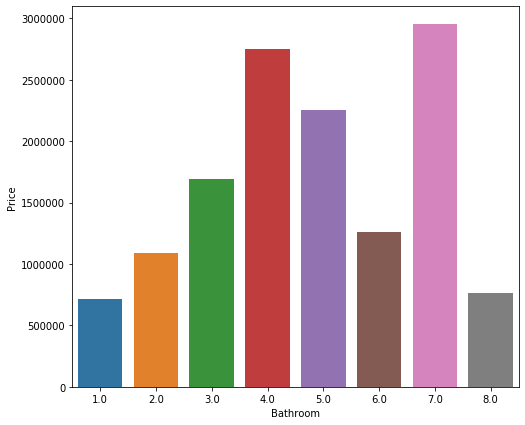

In [40]:
plt.figure(figsize = (8,7))
sns.barplot(x='Bathroom', y='Price', data = rnp)
plt.show()

<blockquote> Jumlah kamar mandi juga tampaknya mempengaruhi harga. Namun saya saya liat 8 kamar mandi dalam rumah tidak laris

#### Type terhadap Price

In [41]:
rnp = rumah.groupby('Type')[['Price','Type']].agg('median')
rnp

,Price
Type,
h,1126000.0
t,820000.0
u,540500.0


<blockquote> Rumah-rumah masih paling mahal di antara yang lainnya. sedangkan townhouse menjadi pilihan kedua, unit apartement menjadi yang paling murah di atara lainnya

#### Dibulan berapa yang terbaik untuk menjual rumah?

In [42]:
rnp = rumah.groupby('Bulan_sold')[['Price','Bulan_sold']].agg('median')
rnp

,Price,Bulan_sold
Bulan_sold,,
2.0,1025000.0,2.0
3.0,1015000.0,3.0
4.0,885000.0,4.0
5.0,938750.0,5.0
6.0,869000.0,6.0
7.0,887250.0,7.0
8.0,960000.0,8.0
9.0,985500.0,9.0
10.0,1050000.0,10.0


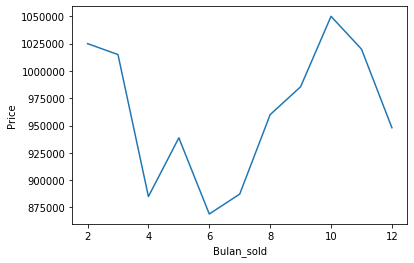

In [43]:
sns.lineplot(x='Bulan_sold', y='Price', data = rnp)

<blockquote> bulan febuari dan bulan oktober adalah bulan terlaris penjualan rumah

### Numerical Variables and their relation with target variable

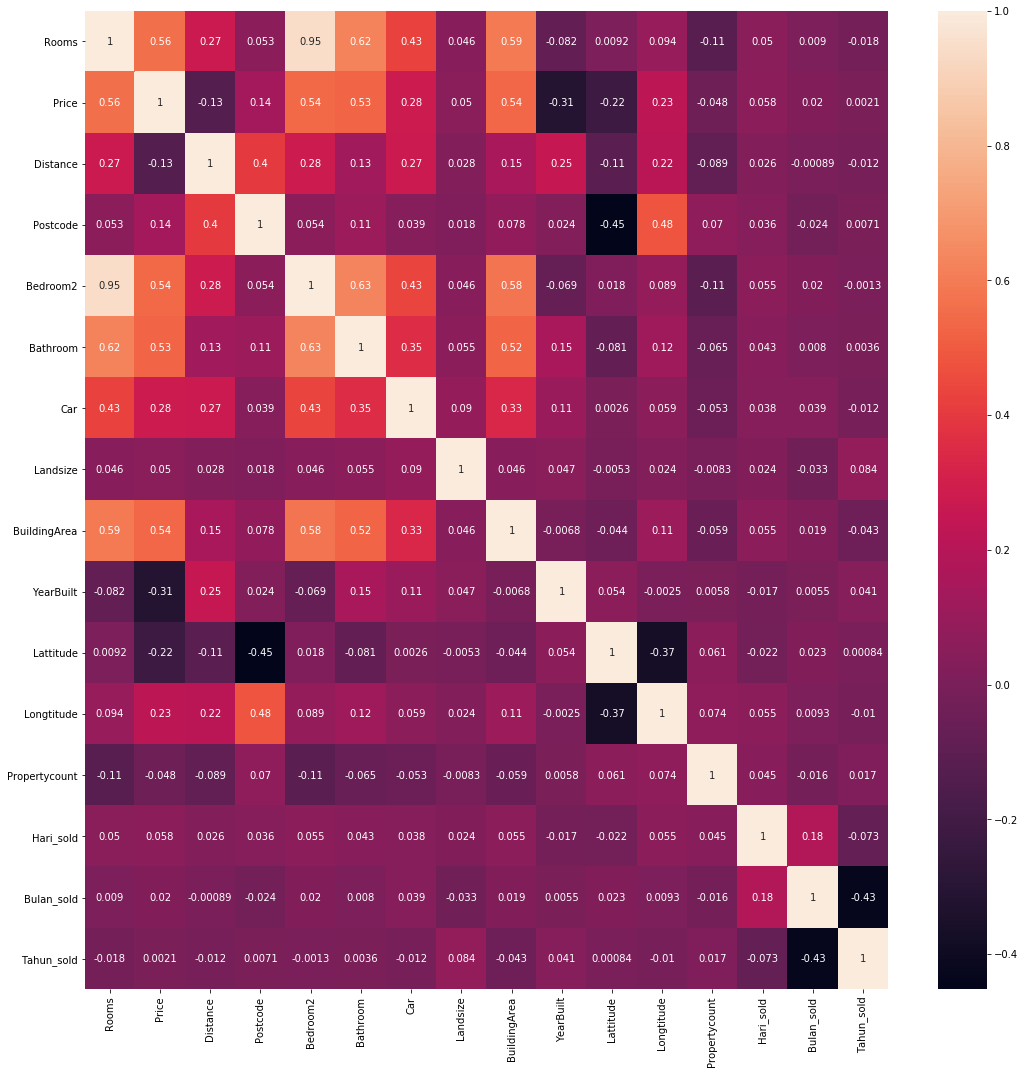

In [44]:
#get correlations of each features in dataset
corrmat = rumah[rumah.describe().columns].corr()
top_corr_features = corrmat.index

plt.figure(figsize=(18,18))

#plot heat map
g=sns.heatmap(rumah[top_corr_features].corr(),annot=True)

<blockquote> 

 berapa features penting:

    - Distance
    - Rooms
    - Bedroom2
    - Bathroom
    - BuildingArea
    - Car
    - YearBuilt
    - Landsize
    - Propertycount

seperti yang sering dilihat di daftar iklan, rata-rata yang terhubung mulai dari berapa banyak ruangan yang dimiliki, di area mana rumah itu di jual,  berapa lama bangunan itu ada dan ada atau tidaknya parkir mobil.


## Model Build

saya menggunakan Robust Scaler untuk penskalaan data ini, karena data memiliki pencilan data, dan Scaler ini tidak didasarkan pada mean atau standar deviasi. Tetapi berdasarkan IQR atau median. Jadi lebih kuat (robust) dengan adanya data outlier.

In [45]:
rumah['Price_Scl'] = RobustScaler().fit_transform(rumah[['Price']])
rumah['Distance_Scl'] = RobustScaler().fit_transform(rumah[['Distance']])
rumah['Bedroom2_Scl'] = RobustScaler().fit_transform(rumah[['Bedroom2']])
rumah['Rooms_Scl'] = RobustScaler().fit_transform(rumah[['Rooms']])
rumah['Bathroom_Scl'] = RobustScaler().fit_transform(rumah[['Bathroom']])
rumah['YearBuilt_Scl'] = RobustScaler().fit_transform(rumah[['YearBuilt']])
rumah['Car_Scl'] = RobustScaler().fit_transform(rumah[['Car']])
rumah['Propertycount_Scl'] = RobustScaler().fit_transform(rumah[['Propertycount']])
rumah['Landsize_Scl'] = RobustScaler().fit_transform(rumah[['Landsize']])
rumah['BuildingArea_Scl'] = RobustScaler().fit_transform(rumah[['BuildingArea']])

rumah.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Price_Scl,Distance_Scl,Bedroom2_Scl,Rooms_Scl,Bathroom_Scl,YearBuilt_Scl,Car_Scl,Propertycount_Scl,Landsize_Scl,BuildingArea_Scl
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02 00:00:00,2.5,3067.0,...,0.209652,-1.032258,-1.0,-0.5,0.0,-1.166667,-1.0,-0.483099,-0.593447,-0.555556
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03 00:00:00,2.5,3067.0,...,0.804705,-1.032258,0.0,0.0,1.0,-1.166667,-1.0,-0.483099,-0.646845,0.320988
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06 00:00:00,2.5,3067.0,...,0.991524,-1.032258,0.0,0.5,0.0,0.733333,1.0,-0.483099,-0.680825,0.222222
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,2016-07-05 00:00:00,2.5,3067.0,...,1.373465,-1.032258,1.0,0.0,1.0,-1.000000,-1.0,-0.483099,-0.377427,1.061728
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,2016-08-10 00:00:00,2.5,3067.0,...,1.041342,-1.032258,-1.0,-0.5,0.0,-1.333333,1.0,-0.483099,-0.350728,-0.209877


ENCODE

In [46]:
cat = rumah.loc[:,rumah.dtypes == np.object].drop(columns = ['Address', 'CouncilArea', 'Date'], axis=1)

In [47]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 8834
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Suburb      5000 non-null   object
 1   Type        5000 non-null   object
 2   Method      5000 non-null   object
 3   SellerG     5000 non-null   object
 4   Regionname  5000 non-null   object
dtypes: object(5)
memory usage: 234.4+ KB


In [48]:
for i in cat:
    cat[i] = LabelEncoder().fit_transform(cat[[i]])

In [49]:
cat

,Suburb,Type,Method,SellerG,Regionname
1,0,0,1,16,2
2,0,0,3,16,2
4,0,0,4,104,2
6,0,0,1,104,2
7,0,0,1,104,2
...,...,...,...,...,...
8416,234,0,1,163,6
8307,203,0,1,86,2
11861,257,0,3,175,6
7373,72,1,1,176,2


In [50]:
rumah = rumah.drop(columns = ['Address', 'CouncilArea', 'Date', 'Method', 'Regionname', 'SellerG', 'Suburb', 'Type'])

In [51]:
rumah = pd.concat([cat,rumah], axis=1)

In [52]:
rumah.isna().sum()

Suburb                  0
Type                    0
Method                  0
SellerG                 0
Regionname              0
Rooms                   0
Price                   0
Distance                0
Postcode                0
Bedroom2                0
Bathroom                0
Car                     0
Landsize                0
BuildingArea            0
YearBuilt               0
Lattitude               0
Longtitude              0
Propertycount           0
Hari_sold            2265
Bulan_sold           2265
Tahun_sold           2265
Price_Scl               0
Distance_Scl            0
Bedroom2_Scl            0
Rooms_Scl               0
Bathroom_Scl            0
YearBuilt_Scl           0
Car_Scl                 0
Propertycount_Scl       0
Landsize_Scl            0
BuildingArea_Scl        0
dtype: int64

#### Splitting Data with 80% Train and 20% Test|

In [53]:
X = rumah.drop(columns = ['Price', 'Bulan_sold', 'Hari_sold', 'Tahun_sold']).values
y = rumah['Price'].values

<blockquote> Saya memilih fitur berdasarkan korelasi data sebelumnya, dan itu ditunjukkan pada data pemisahan di atas.

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

Menggunakan Regresi Linier Sederhana di bawah ini

In [55]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [59]:
print(regressor.coef_) #slope
print(regressor.intercept_) #intercept

[ 1.68722660e-13  3.02406988e-11 -3.93048559e-10  8.61618554e-11
 -4.73779210e-11  5.45267591e-10  6.10354406e-11  1.90063520e-11
 -1.44845465e-10  3.74581824e-11  1.47088711e-10  1.94244620e-12
 -1.26729738e-11 -7.33437200e-11  2.18183834e-09  4.30463939e-09
 -1.42108547e-13  7.22625000e+05  8.02950328e-11 -7.72027314e-10
  4.66466289e-10  3.74287438e-10 -1.02420994e-10  5.10197908e-11
  4.28107098e-11  8.63993824e-11 -1.25743860e-12]
883499.9999995372


In [60]:
x_columns = rumah.drop(columns = ['Price', 'Bulan_sold', 'Hari_sold', 'Tahun_sold']).columns

coeff_df = pd.DataFrame(regressor.coef_, x_columns, columns=['Coefficient/Slope'])  
coeff_df

,Coefficient/Slope
Suburb,1.687227e-13
Type,3.024070e-11
Method,-3.930486e-10
SellerG,8.616186e-11
Regionname,-4.737792e-11
Rooms,5.452676e-10
Distance,6.103544e-11
Postcode,1.900635e-11
Bedroom2,-1.448455e-10
Bathroom,3.745818e-11


In [62]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual' : y_test.flatten(), 'Predicted' : y_pred.flatten()})
df.head()

,Actual,Predicted
0,1125000.0,1125000.0
1,490000.0,490000.0
2,880000.0,880000.0
3,850000.0,850000.0
4,2840000.0,2840000.0


#### Visualize Y Actual & Y Predict

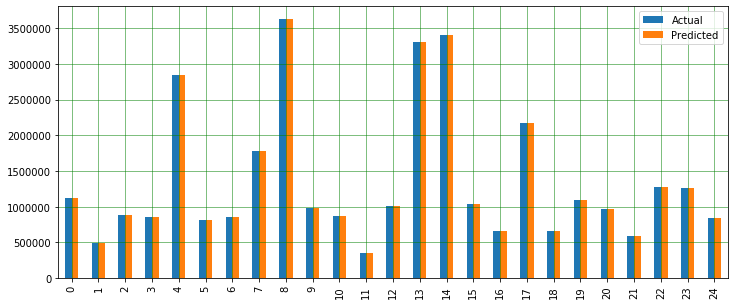

In [65]:
df.head(25).plot(kind = 'bar', figsize = (12,5))
plt.grid(which = 'major', linestyle = '-', linewidth = '0.5', color = 'green')
plt.grid(which = 'minor', linestyle = ':', linewidth = '0.5', color = 'black')
plt.show()

#### Evaluation Model

In [68]:
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2 = round(metrics.r2_score(y_test, y_pred), 2)
mean_target = rumah['Price'].mean()

In [69]:
print('Mean Absolute Error :', MAE)
print('Mean Squared Error :', MSE)
print('Root Mean Squared Error :', RMSE)

Mean Absolute Error : 4.722736775875091e-09
Mean Squared Error : 3.6190817595364856e-17
Root Mean Squared Error : 6.015880450554586e-09


In [70]:
print('Percentage of Error by MAE', round(MAE / mean_target * 100, 2), '%')
print('Percentage of Error by RMSE', round(RMSE / mean_target * 100, 2), '%')
print('R2 Score:', R2)

Percentage of Error by MAE 0.0 %
Percentage of Error by RMSE 0.0 %
R2 Score: 1.0


karna overfiting saya mendapatkan nilai 1
model ini digunakan untuk memprediksi harga rumah, namun karna modelnya terdapatover fiting, agak susah untuk dikatakan bahwa model ini dapat digunakan untuk memprediksi secara tepat.
jika model ini nantinya memprediksi secara tepat maka perusahaan realestate dapat menggunakan model ini untuk memprediksi berapa biaya yang tepat pada lokasi tertentu.